In [18]:
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv('spam.csv')

In [20]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [21]:
df.shape

(5572, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [23]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [24]:
df.sample(5)

,v1,v2
3902,ham,Waiting in e car 4 my mum lor. U leh? Reach ho...
1264,ham,I will see in half an hour
2633,ham,That's what I love to hear :V see you sundayis...
4450,ham,And that is the problem. You walk around in \j...
1523,ham,Yup ok thanx...


In [25]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [26]:
df.sample(5)

,target,text
260,ham,Yup
4555,ham,Gettin rdy to ship comp
1453,ham,Stupid.its not possible
4362,ham,Evry Emotion dsn't hav Words.Evry Wish dsn't h...
1824,ham,Sent me ur email id soon


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [28]:
df["target"] = encoder.fit_transform(df["target"])

In [29]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [31]:
df.duplicated().sum()

403

In [32]:
df = df.drop_duplicates(keep = "first")

In [33]:
df.duplicated().sum()

0

In [34]:
df.shape

(5169, 2)

In [35]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

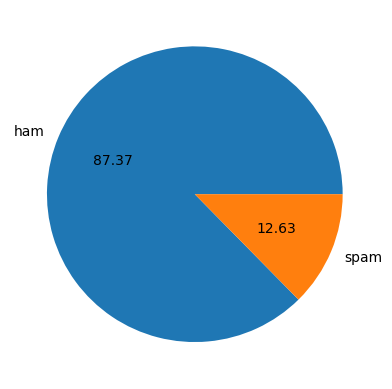

In [36]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels = ["ham","spam"],autopct = "%0.2f")
plt.show()

In [22]:
!pip install nltk

In [37]:
import nltk

In [38]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
df["text"].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [40]:
df["num_cha"] = df["text"].apply(len)

In [41]:
df.head()

,target,text,num_cha
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [43]:
df.head()

,target,text,num_cha,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [45]:
df.head()

,target,text,num_cha,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [47]:
df[["num_cha","num_words","num_sentences"]].describe()

,num_cha,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [49]:
#ham
df[df["target"]==0][["num_cha","num_words","num_sentences"]].describe()

,num_cha,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [50]:
#spam
df[df["target"]==1][["num_cha","num_words","num_sentences"]].describe()

,num_cha,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_cha', ylabel='Count'>

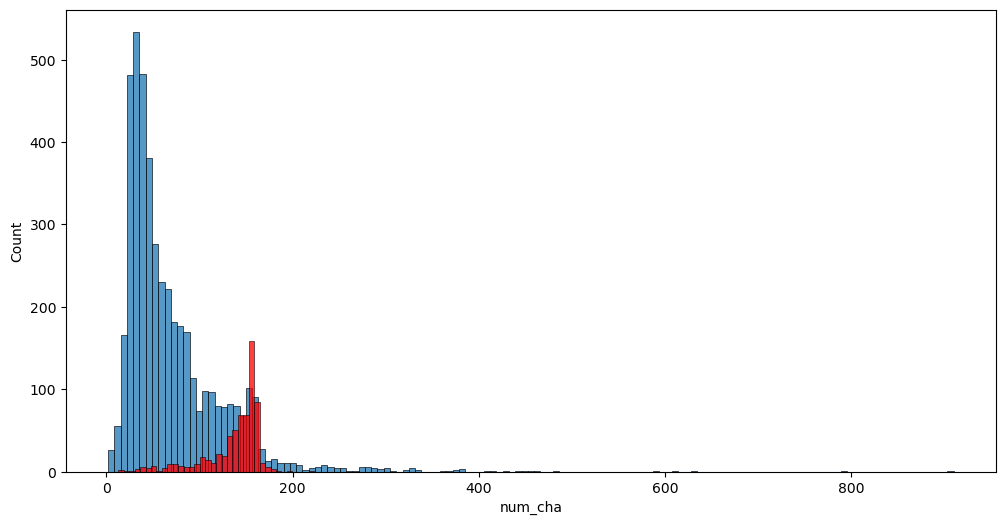

In [51]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_cha"])
sns.histplot(df[df["target"]==1]["num_cha"],color="red")

C:\Users\Priyanshu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


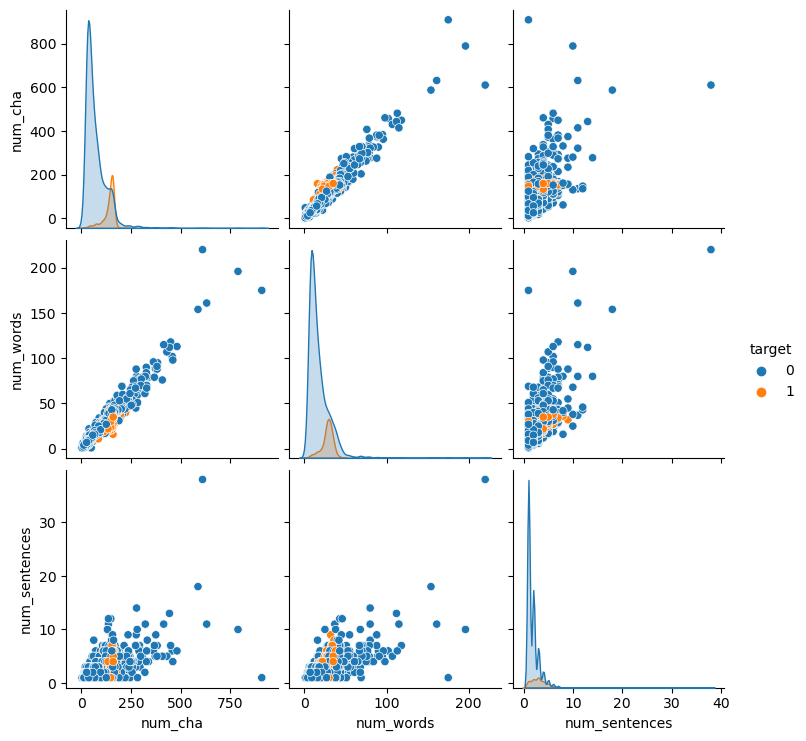

In [52]:
sns.pairplot(df,hue = "target")

In [53]:
df["text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [31]:
#Text processing

In [54]:
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("portstemmer")
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading portstemmer: Package 'portstemmer' not found
[nltk_data]     in index


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [56]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
t = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
transform_text(t)


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [57]:
df["transformed_text"] = df["text"].apply(transform_text)

In [58]:
df.head()

,target,text,num_cha,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [88]:
!pip install wordcloud

In [61]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size=10,background_color="white")

spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep = " "))

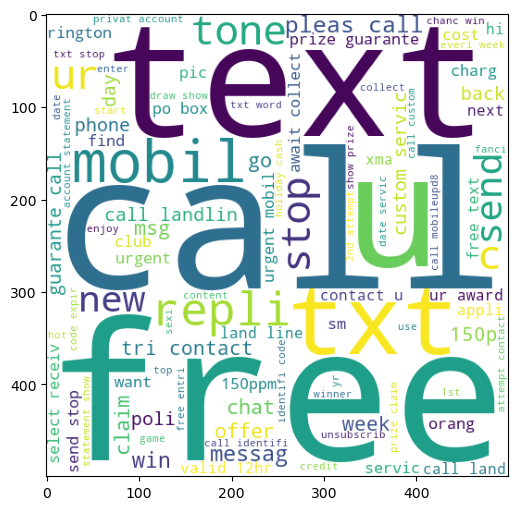

In [62]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [65]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

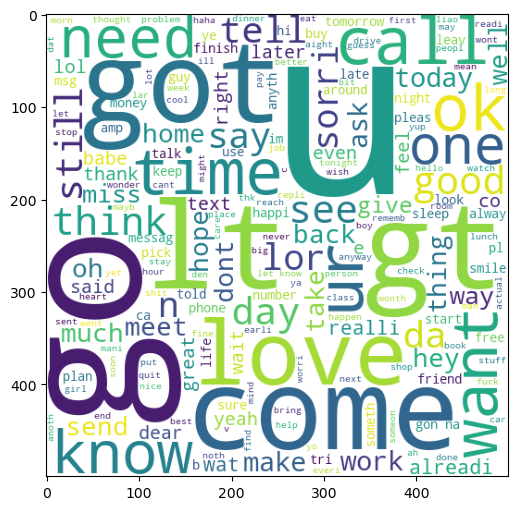

In [66]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [72]:
spam_words = []
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_words.append(word)

In [73]:
len(spam_words)

9941

In [74]:
from collections import Counter
pd.DataFrame(Counter(spam_words).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [111]:
#Model Building

In [76]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [77]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [78]:
X.shape

(5169, 3000)

In [79]:
y = df["target"].values

In [80]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [81]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [84]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
#from sklearn.ensemble import RandomForestClassifier

In [86]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
#rf = RandomForestClassifier(n_estimators=50,random_state=42)

In [87]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [88]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [89]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [91]:
#imporoving model performance

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [91]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)



In [92]:
clfs = {
    "svc" : svc,
    "kn" : knc,
    "mn" : mnb,
    "lr" : lrc,
    "rf" : rfc,
    "ab" : abc,
    "bc" : bc,
    "et" : etc,
    "gb" : gbdt
}

In [94]:
def trainClassfier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [95]:
trainClassfier(abc,X_train,y_train,X_test,y_test)

(0.9613152804642167, 0.9454545454545454)

In [96]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = trainClassfier(clf,X_train,y_train,X_test,y_test)
    
    print("for",name)
    print("accuracy",current_accuracy)
    print("precsion",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


for svc
accuracy 0.9758220502901354
precsion 0.9747899159663865
for kn
accuracy 0.9052224371373307
precsion 1.0
for mn
accuracy 0.971953578336557
precsion 1.0
for lr
accuracy 0.9564796905222437
precsion 0.9696969696969697
for rf
accuracy 0.9748549323017408
precsion 0.9827586206896551
for ab
accuracy 0.9613152804642167
precsion 0.9454545454545454
for bc
accuracy 0.9593810444874274
precsion 0.8692307692307693
for et
accuracy 0.9796905222437138
precsion 0.975609756097561
for gb
accuracy 0.9468085106382979
precsion 0.9278350515463918


In [97]:
performance_df = pd.DataFrame({"Algorihtm":clfs.keys(),"accuracy": accuracy_scores,"precision":precision_scores})

In [98]:
performance_df

,Algorihtm,accuracy,precision
0,svc,0.975822,0.974790
1,kn,0.905222,1.000000
2,mn,0.971954,1.000000
3,lr,0.956480,0.969697
4,rf,0.974855,0.982759
5,ab,0.961315,0.945455
6,bc,0.959381,0.869231
7,et,0.979691,0.975610
8,gb,0.946809,0.927835


In [99]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()

from sklearn.ensemble import VotingClassifier

In [100]:
voting = VotingClassifier(estimators=[("rfc",rfc),("nb",mnb),("etc",etc)],voting="soft")

In [101]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [102]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Confusion_matrix",confusion_matrix(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9913793103448276
Confusion_matrix [[895   1]
 [ 23 115]]


In [105]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))